In [289]:
import pandas as pd
from glob import glob as lsfiles
import numpy as np
import pandas as pd
import datetime
from matplotlib import pyplot as plt
import seaborn as sns
import os
import matplotlib as mpl


from matplotlib import font_manager as fm, rcParams
fpath_reg = os.path.join(mpl.get_data_path(), "/Library/Fonts/RobotoCondensed-Regular.ttf")
prop_reg = fm.FontProperties(fname=fpath_reg)
fpath_light = os.path.join(mpl.get_data_path(), "/Library/Fonts/RobotoCondensed-light.ttf")
prop_light = fm.FontProperties(fname=fpath_light)

pd.options.mode.chained_assignment = None  # default='warn'



In [323]:
import warnings
warnings.filterwarnings('ignore')

In [290]:
df_hosp = pd.read_pickle('df_all_hosp.pkl')
df_death = pd.read_pickle('df_all_death.pkl')
df_case = pd.read_pickle('df_all_case.pkl')

In [291]:
df_hosp['WIS_normalized'] = df_hosp['WIS']/df_hosp['Population']
df_death['WIS_normalized'] = df_death['WIS']/df_death['Population']
df_case['WIS_normalized'] = df_case['WIS']/df_case['Population']

In [292]:
df_hosp = df_hosp.rename(columns= {"WIS_normalized":"values","Model":"group"})
df_death = df_death.rename(columns= {"WIS_normalized":"values","Model":"group"})
df_case = df_case.rename(columns= {"WIS_normalized":"values","Model":"group"})


In [293]:
df_case.head()

,group,WIS,50% Coverage,95% Coverage,Location,Population,Label,values
0,Ensemble,12953.849139,0.666667,0.888889,Alabama,4903185,Median aggregate,0.002642
1,Ensemble_LOP,11988.337519,0.888889,1.000000,Alabama,4903185,Median aggregate,0.002445
2,Ensemble_LOP_untrimmed,14195.242007,0.888889,1.000000,Alabama,4903185,Median aggregate,0.002895
3,JHU_IDD-CovidSP,11580.590399,0.888889,1.000000,Alabama,4903185,Median aggregate,0.002362
4,MOBS_NEU-GLEAM_COVID,11230.877077,0.333333,0.555556,Alabama,4903185,Median aggregate,0.002291


In [294]:
df_hosp.drop(df_hosp[df_hosp.group == 'NotreDame-FRED'].index, inplace=True)
df_hosp.drop(df_hosp[df_hosp.group == 'UTA-ImmunoSEIRS'].index, inplace=True)


df_death.drop(df_death[df_death.group == 'NotreDame-FRED'].index, inplace=True)
df_death.drop(df_death[df_death.group == 'UTA-ImmunoSEIRS'].index, inplace=True)


df_case.drop(df_case[df_case.group == 'NotreDame-FRED'].index, inplace=True)
df_case.drop(df_case[df_case.group == 'UTA-ImmunoSEIRS'].index, inplace=True)


In [295]:
df_case.group.unique()

array(['Ensemble', 'Ensemble_LOP', 'Ensemble_LOP_untrimmed',
       'JHU_IDD-CovidSP', 'MOBS_NEU-GLEAM_COVID', 'UNCC-hierbin',
       'USC-SIkJalpha', 'UVA-EpiHiper', 'UVA-adaptive'], dtype=object)

In [307]:
models = list(df_case.group.unique())
allmed = []
for model in models:
    med = df_case[df_case['group']== model]['WIS'].median()
    allmed.append(med)

In [308]:
a = zip(models, allmed)
a=list(a)
res = sorted(a, key = lambda x: x[1])
modelorder = list(zip(*res))[0]

In [309]:
#df_hosp.group = df_hosp.group.astype("category")
#df_hosp.group = df_hosp.group.cat.set_categories(modelorder)
#df_hosp.sort_values(["group"])


#df_death.group = df_death.group.astype("category")
#df_death.group = df_death.group.cat.set_categories(modelorder)
#df_death.sort_values(["group"])


df_case.group = df_case.group.astype("category")
df_case.group = df_case.group.cat.set_categories(modelorder)
df_case.sort_values(["group"])

,group,WIS,50% Coverage,95% Coverage,Location,Population,Label,values
233,MOBS_NEU-GLEAM_COVID,13078.904500,0.222222,0.555556,Missouri,6626371,Median aggregate,0.001974
278,MOBS_NEU-GLEAM_COVID,12461.187087,0.222222,0.444444,New Jersey,8882190,Median aggregate,0.001403
77,MOBS_NEU-GLEAM_COVID,1183.398973,0.222222,0.555556,District of Columbia,705749,Median aggregate,0.001677
287,MOBS_NEU-GLEAM_COVID,8112.574618,0.111111,0.333333,New Mexico,2096829,Median aggregate,0.003869
296,MOBS_NEU-GLEAM_COVID,24026.719859,0.222222,0.444444,New York,19453561,Median aggregate,0.001235
...,...,...,...,...,...,...,...,...
388,USC-SIkJalpha,24304.607471,0.000000,0.333333,Tennessee,6829174,Median aggregate,0.003559
289,USC-SIkJalpha,37042.774993,0.111111,0.333333,New Mexico,2096829,Median aggregate,0.017666
15,USC-SIkJalpha,19688.634821,0.111111,0.333333,Alaska,731545,Median aggregate,0.026914
107,USC-SIkJalpha,5880.622662,0.111111,0.222222,Hawaii,1415872,Median aggregate,0.004153


In [310]:
models = list(df_case.group.unique())
allmed = []
for model in models:
    med = df_case[df_case['group']== model]['values'].median()
    allmed.append(med)
a = zip(models, allmed)
a=list(a)
res = sorted(a, key = lambda x: x[1])
modelorder = list(zip(*res))[0]
df_case.group = df_case.group.astype("category")
df_case.group = df_case.group.cat.set_categories(modelorder)
df_case.sort_values(["group"])

,group,WIS,50% Coverage,95% Coverage,Location,Population,Label,values
233,MOBS_NEU-GLEAM_COVID,13078.904500,0.222222,0.555556,Missouri,6626371,Median aggregate,0.001974
278,MOBS_NEU-GLEAM_COVID,12461.187087,0.222222,0.444444,New Jersey,8882190,Median aggregate,0.001403
77,MOBS_NEU-GLEAM_COVID,1183.398973,0.222222,0.555556,District of Columbia,705749,Median aggregate,0.001677
287,MOBS_NEU-GLEAM_COVID,8112.574618,0.111111,0.333333,New Mexico,2096829,Median aggregate,0.003869
296,MOBS_NEU-GLEAM_COVID,24026.719859,0.222222,0.444444,New York,19453561,Median aggregate,0.001235
...,...,...,...,...,...,...,...,...
98,USC-SIkJalpha,22004.905928,0.222222,0.888889,Georgia,10617423,Median aggregate,0.002073
425,USC-SIkJalpha,45301.068870,0.111111,0.111111,Virginia,8535519,Median aggregate,0.005307
235,USC-SIkJalpha,101292.627159,0.111111,0.222222,Missouri,6626371,Median aggregate,0.015286
226,USC-SIkJalpha,10720.516674,0.000000,0.555556,Mississippi,2976149,Median aggregate,0.003602


In [389]:
def create_penguin_plots(data,kde_args, title ,color = "#49AFB7",color_category=None, group2name = None):
    
    """
    input:
    data (pandas dataframe): with the two columns named group and values
    kde_args (dictionary): contains information for the kde (lw is the line with, bw_adjust changes the smoothing), look up these args in seaborns kde plots to get more info
    color category: colors the dots different colors depending other whether you want to show that
    group2name (dict): keys are the groups (whatever is in the group column) and values are the "names"
    
    output: fig/ax of figure
    """


    total_groups = data.group.unique().shape[0]
    total_min = 0 #data['values'].min()*-1.2
    total_max = data['values'].max()*1.2


    fig, ax = plt.subplots(total_groups*2,1,figsize = (22,total_groups*2.3),tight_layout = False)
    plt.subplots_adjust(hspace=-.08)

    i = 0
    for group, df in data.groupby("group"):


        values = df["values"].values # this is the list of values you are showing in your distribution
        print(group,np.median(values))


        #distribution
        sns.kdeplot(values, ax = ax[i],shade=True,lw=kde_args["lw"],bw_adjust=kde_args["bw_adjust"],color = color,)
        #sns.distplot(US_values, ax = ax[i],hist = False,
        #      kde_kws={"shade":False,"lw":"3"},color = "w")

        min_,max_ = ax[i].get_ylim()

        ax[i].set_ylim(ymin = 0, ymax = max_*1.1)


        sns.boxplot(values,ax = ax[i+1],color = color, showfliers = False, linewidth=1)
        for patch in ax[i+1].patches:
            r, g, b, a = patch.get_facecolor()
            patch.set_facecolor((r, g, b, .1))
            #fc = patch.get_facecolor()
            #patch.set_facecolor(mpl.colors.to_rgba(fc, 0.1))

        if color_category:
            cmap = mpl.cm.get_cmap('Set2', df.continent_label.unique().shape[0])
            ci = 0
            for cont, df_cont in df.groupby(color_category):
                sns.swarmplot(df_cont['values'].values,ax = ax[i+1],color = cmap(ci),alpha = .9,label = cont)
                ci+=1
            if i+1 ==1:
                ax[i+1].legend(loc = 1, prop= prop_light)
        else:
            sns.swarmplot(values,ax = ax[i+1],color = color,alpha = .35,) 

        ax[i].axis("off")
        ax[i+1].axis("off")

        ax[i+1].set_xlim(xmin = total_min,xmax = total_max,)
        ax[i].set_xlim(xmin = total_min,xmax = total_max)

        ax[i+1].set_ylim(-.6,.5)
        #if i != 6:
        #    ax[i+1].hlines(y = -.6,xmin = total_min,xmax = total_max,linewidth = 2,zorder = 100,color = "#49AFB7")

        text = "%s"
        if group2name:
            ax[i].text(.03,0,group2name[group],transform=ax[i].transAxes,  horizontalalignment= "right",\
               fontsize = 14, verticalalignment='center',backgroundcolor = "w")
        else:
            ax[i].text(-.005,0,group,transform=ax[i].transAxes,  horizontalalignment= "right",\
               fontsize = 14, verticalalignment='center',backgroundcolor = "w")
        i +=2
    last = i+1-2
    ax[last].axis("on")
    ax[last].spines["top"].set_visible(False)
    ax[last].spines["left"].set_visible(False)
    ax[last].spines["right"].set_visible(False)
    ax[last].set_facecolor("none")


    #Test
    ticks = ax[last].get_xticks()
    print(ticks)
    #ax[last-1].set_xticks([round(i,4) for i in ticks])
    #ax[last].set_xticklabels(["{:,}".format(int(i)) for i in ticks],  fontsize = 16)
    #ax[last-1].set_xticklabels([round(i,4) for i in ticks],  fontsize = 16)
    
    for t in ticks:
        if t != 0:
            for ii in range(total_groups*2):
                ax[ii].axvline(x = t,ymin = 0,ymax= 1,linewidth = .8,zorder = 0,color = "gray",alpha = 0.5)
                #ax[ii].vlines(x = t+5000,ymin = -.5,ymax= .444,linewidth = .8,zorder = 0,color = "gray",alpha = 0.5)
    plt.suptitle(title, fontsize=20)
    return fig, ax



Ensemble 3.710252165750786e-05
JHU_IDD-CovidSP 3.9983769096085856e-05
Ensemble_LOP 4.72840980354098e-05
Ensemble_LOP_untrimmed 6.9549338720405e-05


/Users/clara/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/clara/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/clara/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.w

UNCC-hierbin 9.500389495511381e-05
MOBS_NEU-GLEAM_COVID 0.00011217170402133078
UVA-EpiHiper 0.00013251526149931034
UVA-adaptive 0.00014916709586297873
USC-SIkJalpha 0.00043084115259448783
[0.     0.0002 0.0004 0.0006 0.0008 0.001  0.0012 0.0014]


/Users/clara/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/clara/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/clara/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.w

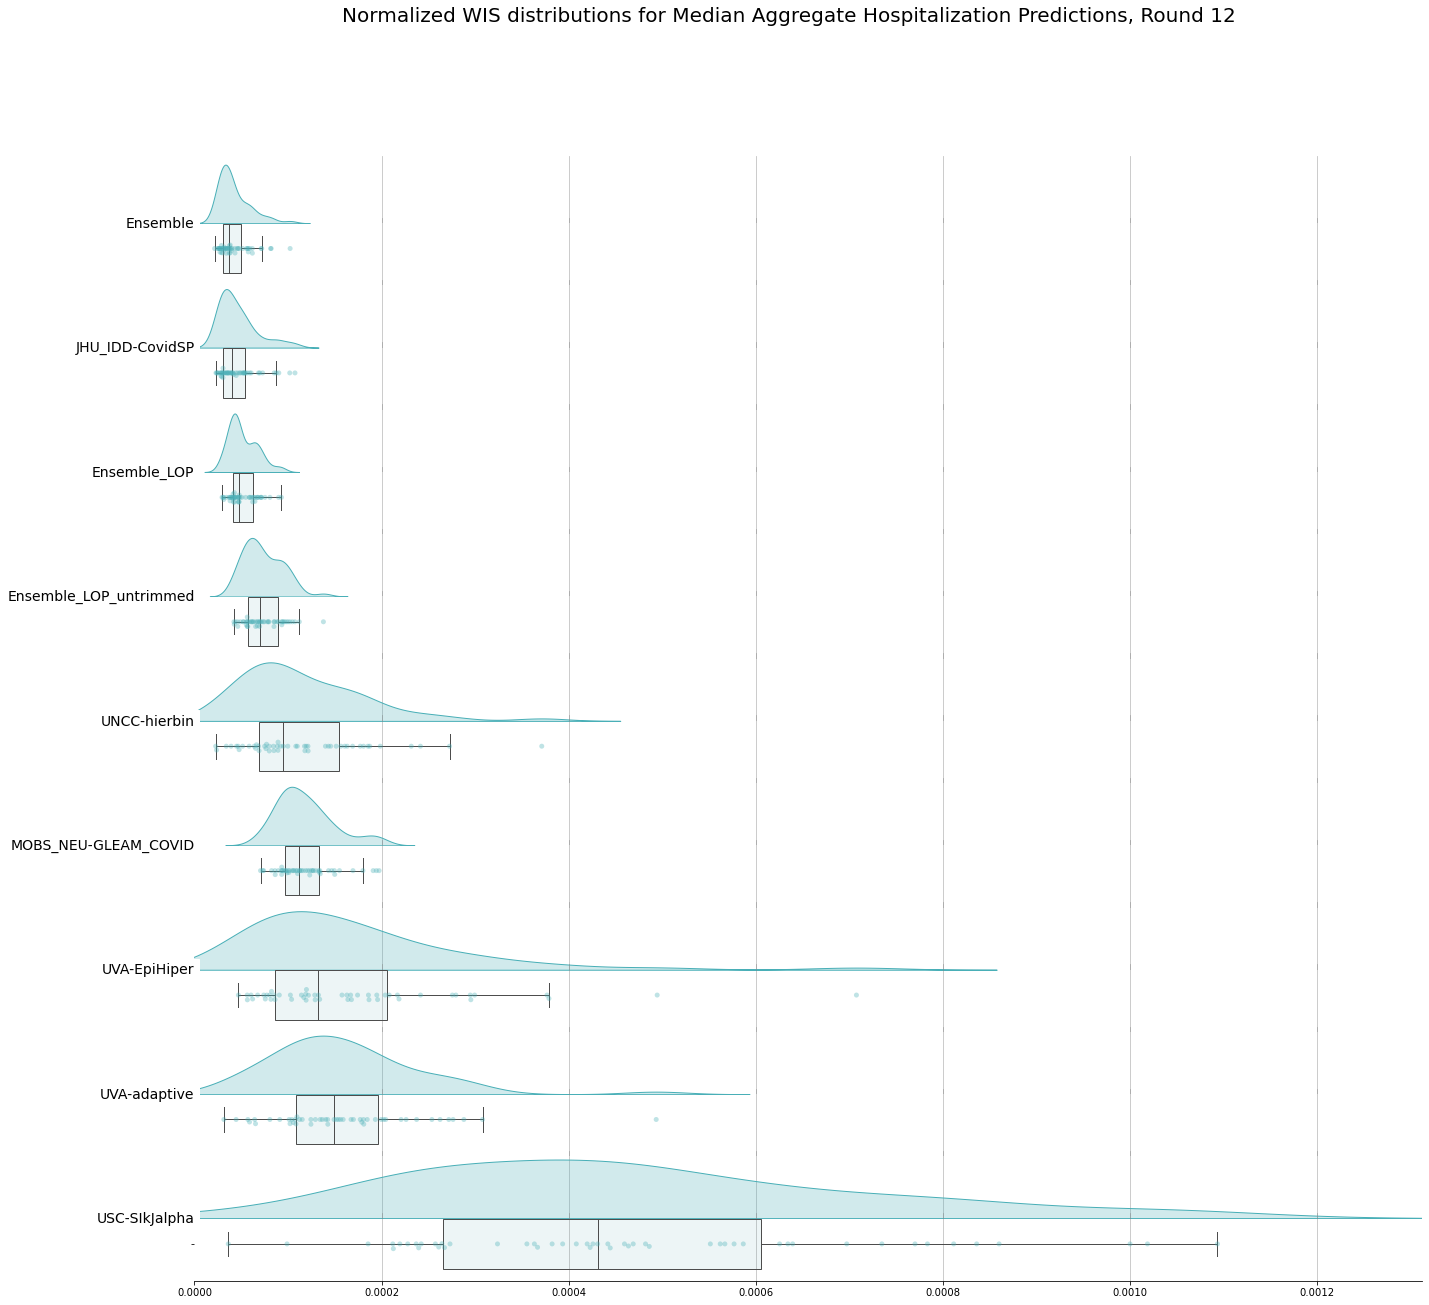

In [317]:

fig, ax_mat = create_penguin_plots(df_hosp,kde_args = {"lw":1,"bw_adjust":.9},
                                   title = 'Normalized WIS distributions for Median Aggregate Hospitalization Predictions, Round 12')
plt.savefig('distributionsplot_hosp.pdf')

Ensemble_LOP 1.340363583877401e-05
UVA-EpiHiper 1.3561634198757235e-05
Ensemble_LOP_untrimmed 1.392936219696301e-05
JHU_IDD-CovidSP 1.488484184584286e-05
MOBS_NEU-GLEAM_COVID 1.4934117252348008e-05
Ensemble 1.6250612968414835e-05
UNCC-hierbin 2.7037025076271336e-05
UVA-adaptive 3.47080121783535e-05
USC-SIkJalpha 6.638997459310203e-05
[0.0e+00 5.0e-05 1.0e-04 1.5e-04 2.0e-04 2.5e-04 3.0e-04 3.5e-04 4.0e-04
 4.5e-04]


/Users/clara/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/clara/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/clara/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.w

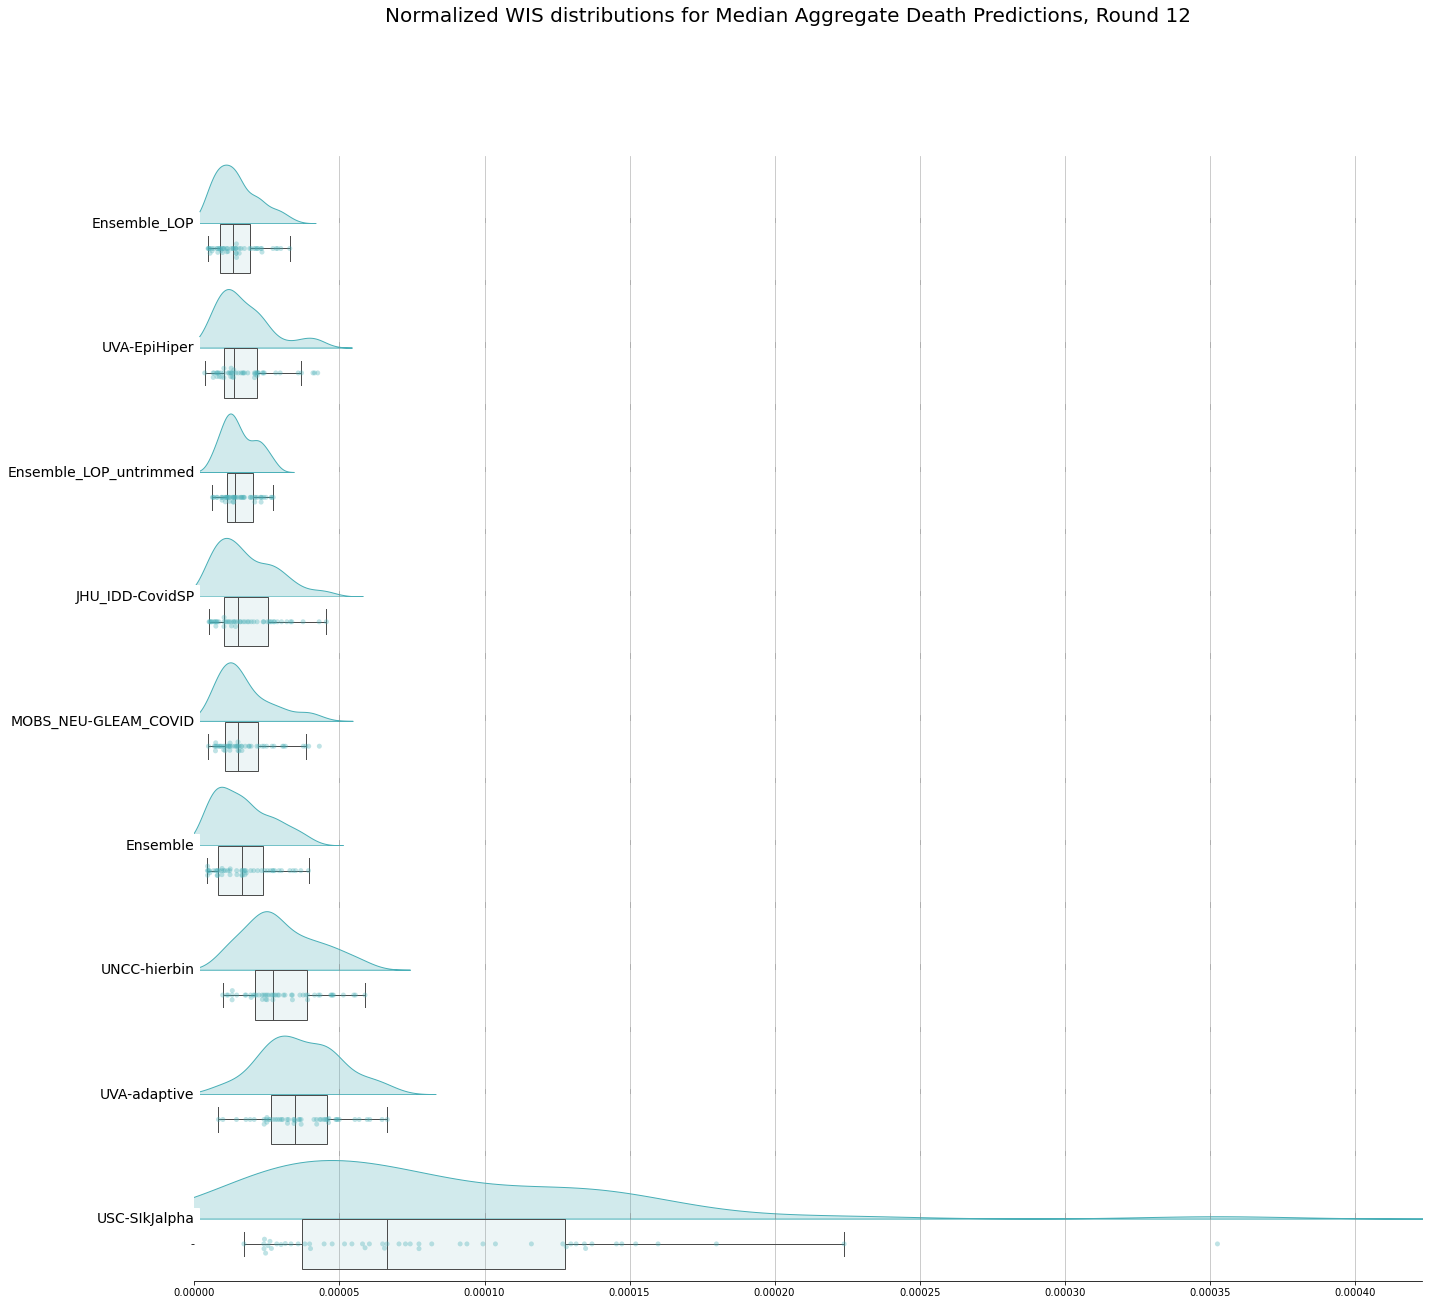

In [316]:
fig, ax_mat = create_penguin_plots(df_death,kde_args = {"lw":1,"bw_adjust":.9},
                                   title = 'Normalized WIS distributions for Median Aggregate Death Predictions, Round 12')
plt.savefig('distributionsplot_death.pdf')

MOBS_NEU-GLEAM_COVID 0.0022918380762062644
Ensemble_LOP 0.0029477634919837853
Ensemble 0.003069779255628768
Ensemble_LOP_untrimmed 0.003206212568640769
JHU_IDD-CovidSP 0.0035758398735711004
UNCC-hierbin 0.005718642556822831
UVA-EpiHiper 0.006133404711347134
UVA-adaptive 0.006512335623357892
USC-SIkJalpha 0.01004689824561058
[0.   0.01 0.02 0.03 0.04 0.05]


/Users/clara/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/clara/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/clara/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.w

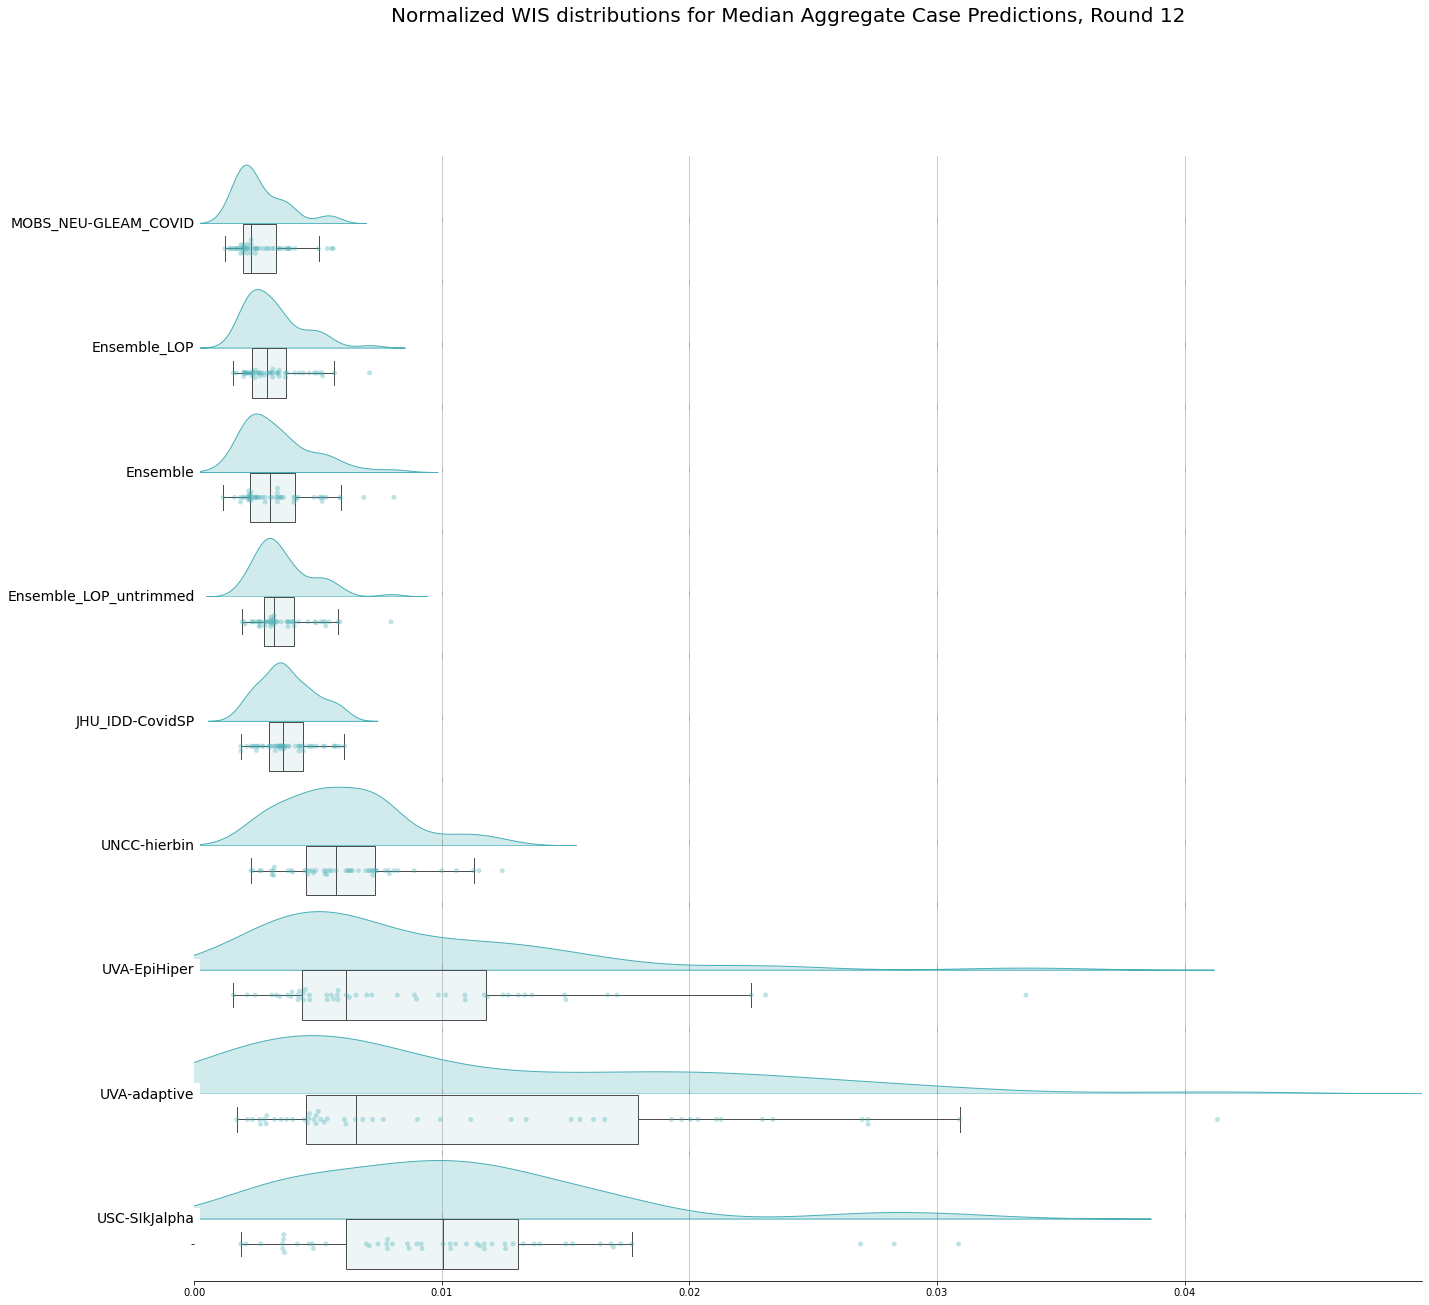

In [315]:
fig, ax_mat = create_penguin_plots(df_case,kde_args = {"lw":1,"bw_adjust":.9},
                                   title = 'Normalized WIS distributions for Median Aggregate Case Predictions, Round 12')
plt.savefig('distributionsplot_case.pdf')

# MAPE Analysis

In [370]:
df_hosp_mape = pd.read_pickle('mapedf_hosp.pkl')
df_death_mape = pd.read_pickle('mapedf_death.pkl')
df_case_mape = pd.read_pickle('mapedf_case.pkl')

In [371]:
df_hosp_mape

,Model,Location,Population,MAPE
0,Ensemble,Alabama,4903185.0,0.447117
1,Ensemble,Alaska,731545.0,0.235920
2,Ensemble,Arizona,7278717.0,0.474339
3,Ensemble,Arkansas,3017804.0,0.536496
4,Ensemble,California,39512223.0,0.421247
...,...,...,...,...
458,UVA-adaptive,Wyoming,578759.0,0.872877
459,UTA-ImmunoSEIRS,California,39512223.0,0.557125
460,UTA-ImmunoSEIRS,Florida,21477737.0,0.604150
461,UTA-ImmunoSEIRS,Massachusetts,6892503.0,0.474553


In [372]:
df_hosp_mape = df_hosp_mape.rename(columns= {"MAPE":"values","Model":"group"})
df_death_mape = df_death_mape.rename(columns= {"MAPE":"values","Model":"group"})
df_case_mape = df_case_mape.rename(columns= {"MAPE":"values","Model":"group"})


In [373]:
models = list(df_hosp_mape.group.unique())
allmed = []
for model in models:
    med = df_hosp_mape[df_hosp_mape['group']== model]['values'].median()
    allmed.append(med)
    
a = zip(models, allmed)
a=list(a)
res = sorted(a, key = lambda x: x[1])
modelorder = list(zip(*res))[0]

df_hosp_mape.group = df_hosp_mape.group.astype("category")
df_hosp_mape.group = df_hosp_mape.group.cat.set_categories(modelorder)
df_hosp_mape.sort_values(["group"])



models = list(df_death_mape.group.unique())
allmed = []
for model in models:
    med = df_death_mape[df_death_mape['group']== model]['values'].median()
    allmed.append(med)
    
a = zip(models, allmed)
a=list(a)
res = sorted(a, key = lambda x: x[1])
modelorder = list(zip(*res))[0]

df_death_mape.group = df_death_mape.group.astype("category")
df_death_mape.group = df_death_mape.group.cat.set_categories(modelorder)
df_death_mape.sort_values(["group"])




models = list(df_case_mape.group.unique())
allmed = []
for model in models:
    med = df_case_mape[df_case_mape['group']== model]['values'].median()
    allmed.append(med)
    
a = zip(models, allmed)
a=list(a)
res = sorted(a, key = lambda x: x[1])
modelorder = list(zip(*res))[0]

df_case_mape.group = df_case_mape.group.astype("category")
df_case_mape.group = df_case_mape.group.cat.set_categories(modelorder)
df_case_mape.sort_values(["group"])

,group,Location,Population,values
462,UTA-ImmunoSEIRS,Texas,28995881.0,0.668945
459,UTA-ImmunoSEIRS,California,39512223.0,0.623602
461,UTA-ImmunoSEIRS,Massachusetts,6892503.0,0.632869
460,UTA-ImmunoSEIRS,Florida,21477737.0,0.718661
227,MOBS_NEU-GLEAM_COVID,Minnesota,5639632.0,0.869921
...,...,...,...,...
395,UVA-EpiHiper,Pennsylvania,12801989.0,8.475310
394,UVA-EpiHiper,Oregon,4217737.0,3.564341
393,UVA-EpiHiper,Oklahoma,3956971.0,1.931695
402,UVA-EpiHiper,Vermont,623989.0,1.813983


Ensemble_LOP_untrimmed 0.32268301161599194
Ensemble 0.32853990811102723
Ensemble_LOP 0.3309265490110612
JHU_IDD-CovidSP 0.3595892774782532
UNCC-hierbin 0.5256207230068388
UTA-ImmunoSEIRS 0.5436129328889026
MOBS_NEU-GLEAM_COVID 0.841265017372578
UVA-adaptive 0.8981072388876994
UVA-EpiHiper 1.4581897569381062
USC-SIkJalpha 3.1492958020127504
[-2.  0.  2.  4.  6.  8. 10. 12. 14. 16.]


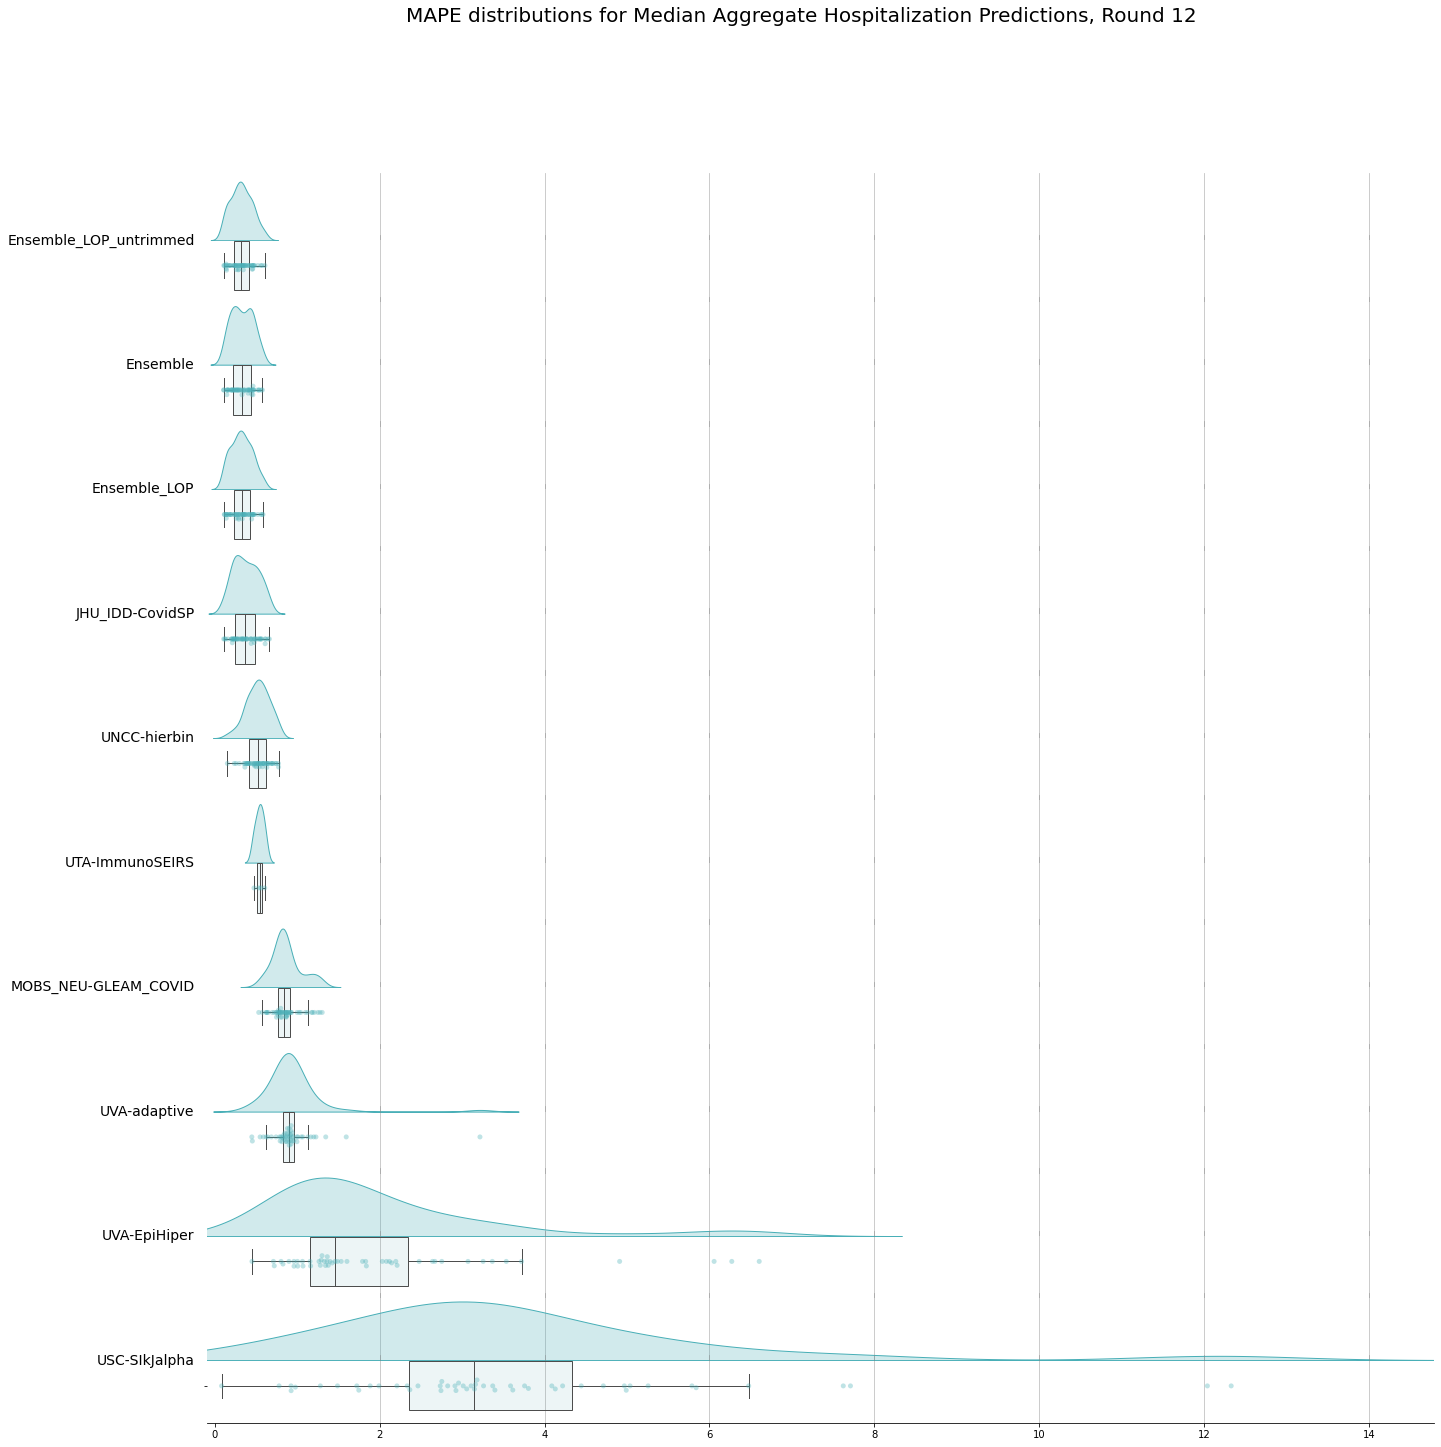

In [374]:
fig, ax_mat = create_penguin_plots(df_hosp_mape,kde_args = {"lw":1,"bw_adjust":.9},
                                   title = 'MAPE distributions for Median Aggregate Hospitalization Predictions, Round 12')
#plt.savefig('distributionsplot_hosp.pdf')

Ensemble_LOP 0.5166675567511994
Ensemble_LOP_untrimmed 0.5170250345078754
Ensemble 0.5269651381875662
UTA-ImmunoSEIRS 0.5435518874693326
MOBS_NEU-GLEAM_COVID 0.589180198602315
JHU_IDD-CovidSP 0.5950911731017556
UVA-EpiHiper 0.6191875915415482
UNCC-hierbin 0.7124128931031609
NotreDame-FRED 0.7337340725686101
UVA-adaptive 0.9367298209408924
USC-SIkJalpha 2.8352048930011784
[-5.  0.  5. 10. 15. 20. 25. 30. 35. 40. 45.]


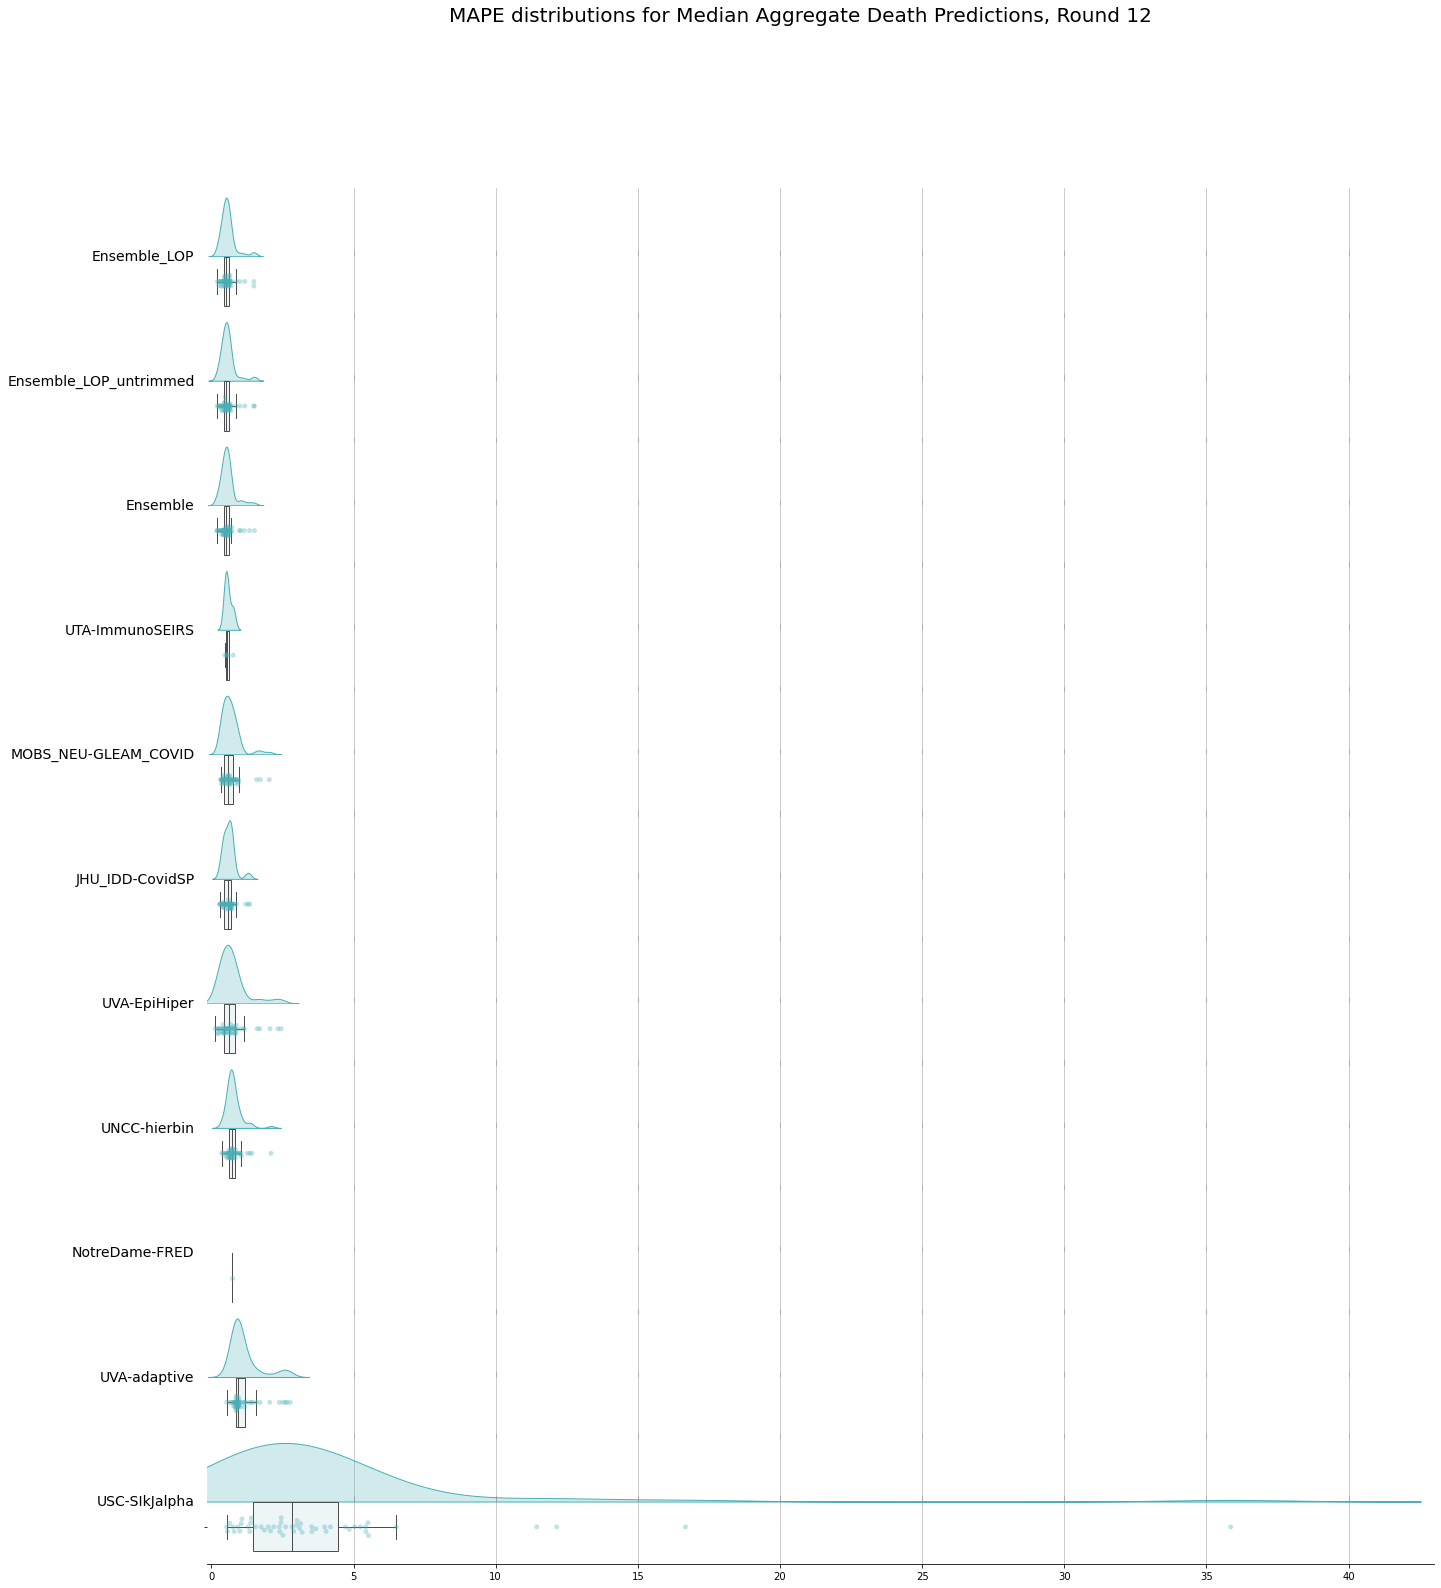

In [375]:
fig, ax_mat = create_penguin_plots(df_death_mape,kde_args = {"lw":1,"bw_adjust":.9},
                                   title = 'MAPE distributions for Median Aggregate Death Predictions, Round 12')
#plt.savefig('distributionsplot_hosp.pdf')

UTA-ImmunoSEIRS 0.6509071055716397
MOBS_NEU-GLEAM_COVID 0.8046222850430002
UVA-adaptive 1.1044417427598314
JHU_IDD-CovidSP 1.2371607977878107
Ensemble_LOP 1.3298502007254656
Ensemble_LOP_untrimmed 1.3307483609453286
Ensemble 1.4098255242560924
USC-SIkJalpha 2.59938286702893
UNCC-hierbin 3.3246334333675067
UVA-EpiHiper 5.363978102146348
[-5.  0.  5. 10. 15. 20. 25. 30.]


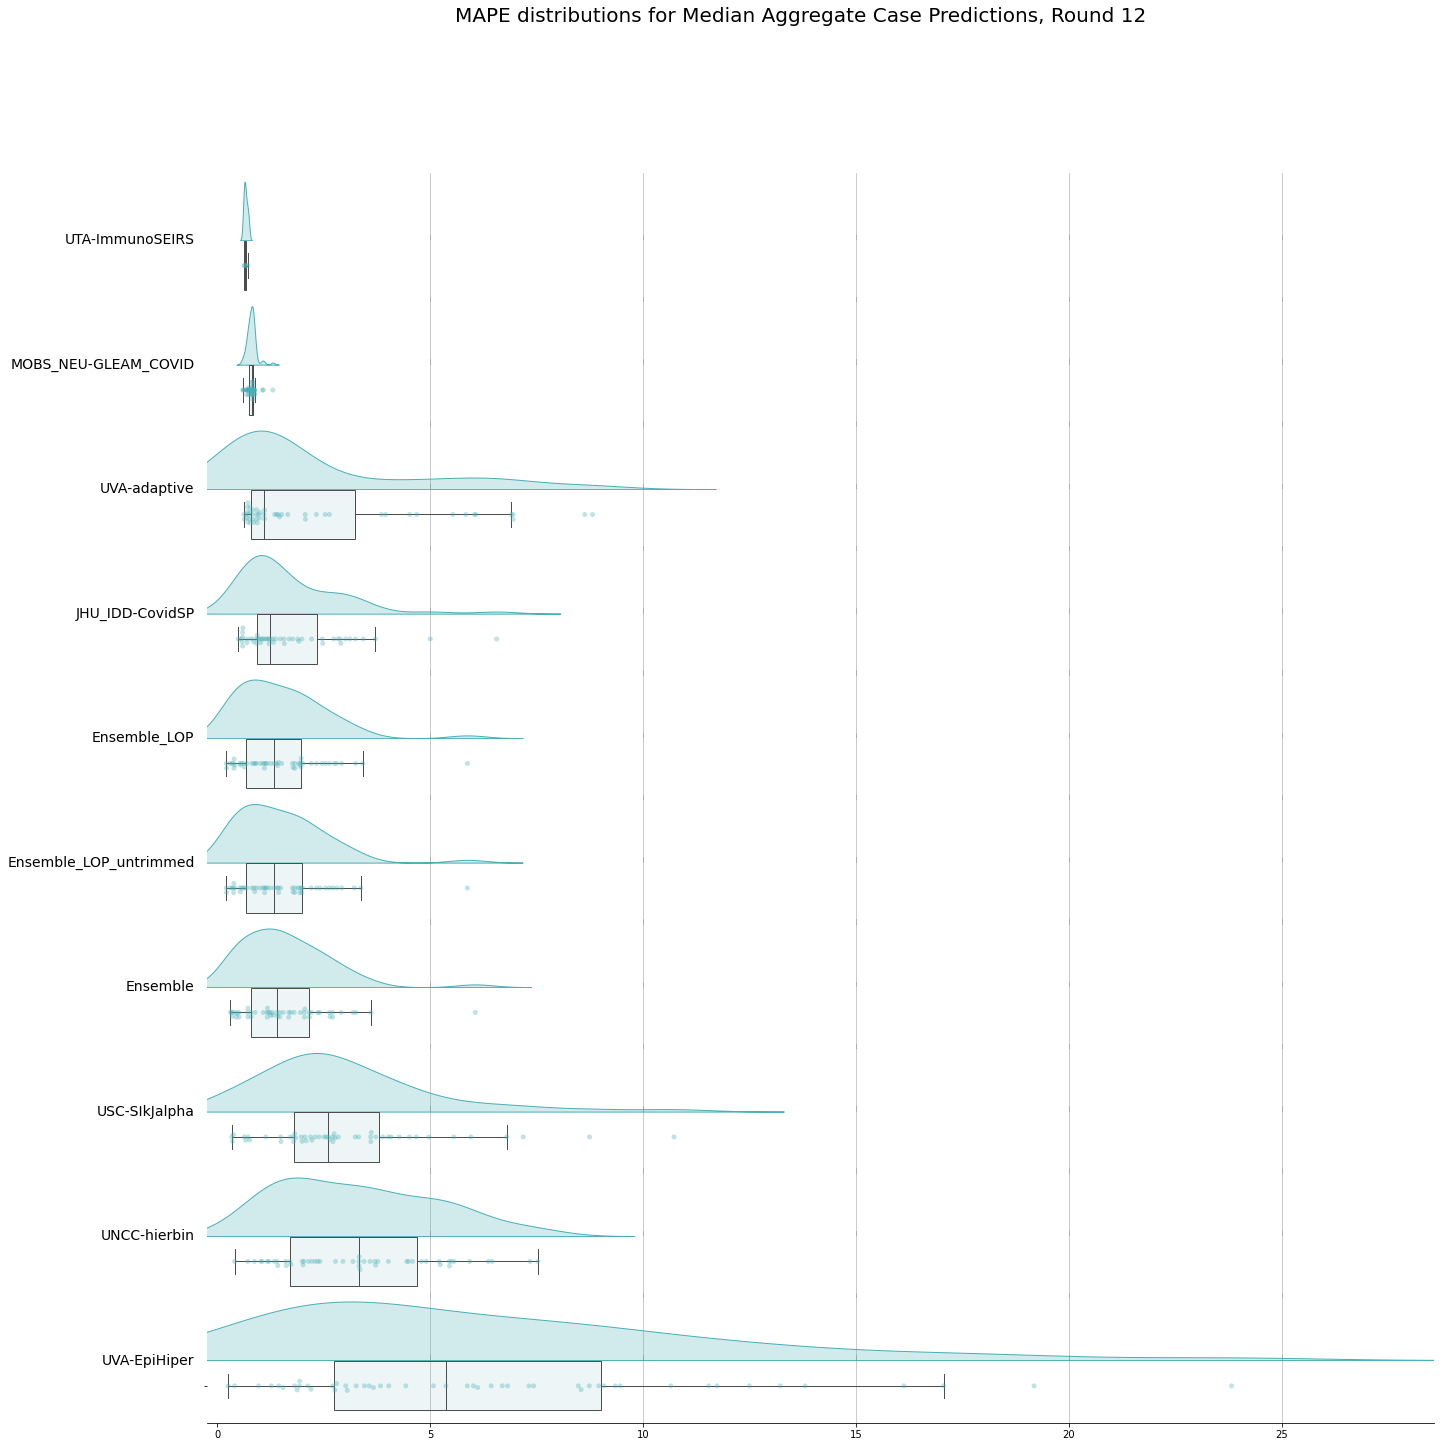

In [376]:
fig, ax_mat = create_penguin_plots(df_case_mape,kde_args = {"lw":1,"bw_adjust":.9},
                                   title = 'MAPE distributions for Median Aggregate Case Predictions, Round 12')
#plt.savefig('distributionsplot_hosp.pdf')

In [377]:
mapealldf = pd.concat([df_case_mape, df_death_mape, df_hosp_mape])

In [378]:
mapealldf = mapealldf[mapealldf.group != 'NotreDame-FRED']
mapealldf = mapealldf[mapealldf.group != 'UTA-ImmunoSEIRS']

In [381]:
models = list(mapealldf.group.unique())
allmed = []
for model in models:
    med = mapealldf[mapealldf['group']== model]['values'].median()
    allmed.append(med)
    
a = zip(models, allmed)
a=list(a)
res = sorted(a, key = lambda x: x[1])
modelorder = list(zip(*res))[0]

mapealldf.group = mapealldf.group.astype("category")
mapealldf.group = mapealldf.group.cat.set_categories(modelorder)
mapealldf.sort_values(["group"])


,group,Location,Population,values
152,Ensemble_LOP_untrimmed,Wyoming,578759.0,0.339771
144,Ensemble_LOP_untrimmed,Tennessee,6829174.0,0.553897
143,Ensemble_LOP_untrimmed,South Dakota,884659.0,0.521041
142,Ensemble_LOP_untrimmed,South Carolina,5148714.0,0.622766
141,Ensemble_LOP_untrimmed,Rhode Island,1059361.0,0.252315
...,...,...,...,...
327,USC-SIkJalpha,Massachusetts,6892503.0,4.967522
328,USC-SIkJalpha,Michigan,9986857.0,3.180374
329,USC-SIkJalpha,Minnesota,5639632.0,2.753160
319,USC-SIkJalpha,Illinois,12671821.0,3.012648


Ensemble_LOP_untrimmed 0.4823468988442884
Ensemble_LOP 0.4832471415897815
Ensemble 0.5002940951755537
JHU_IDD-CovidSP 0.5943438808290566
UNCC-hierbin 0.721800754511586
MOBS_NEU-GLEAM_COVID 0.7809200722556671
UVA-adaptive 0.9244436721727217
UVA-EpiHiper 1.4581897569381062
USC-SIkJalpha 2.8385903356194517
[ 0.  5. 10. 15. 20. 25. 30. 35. 40. 45.]


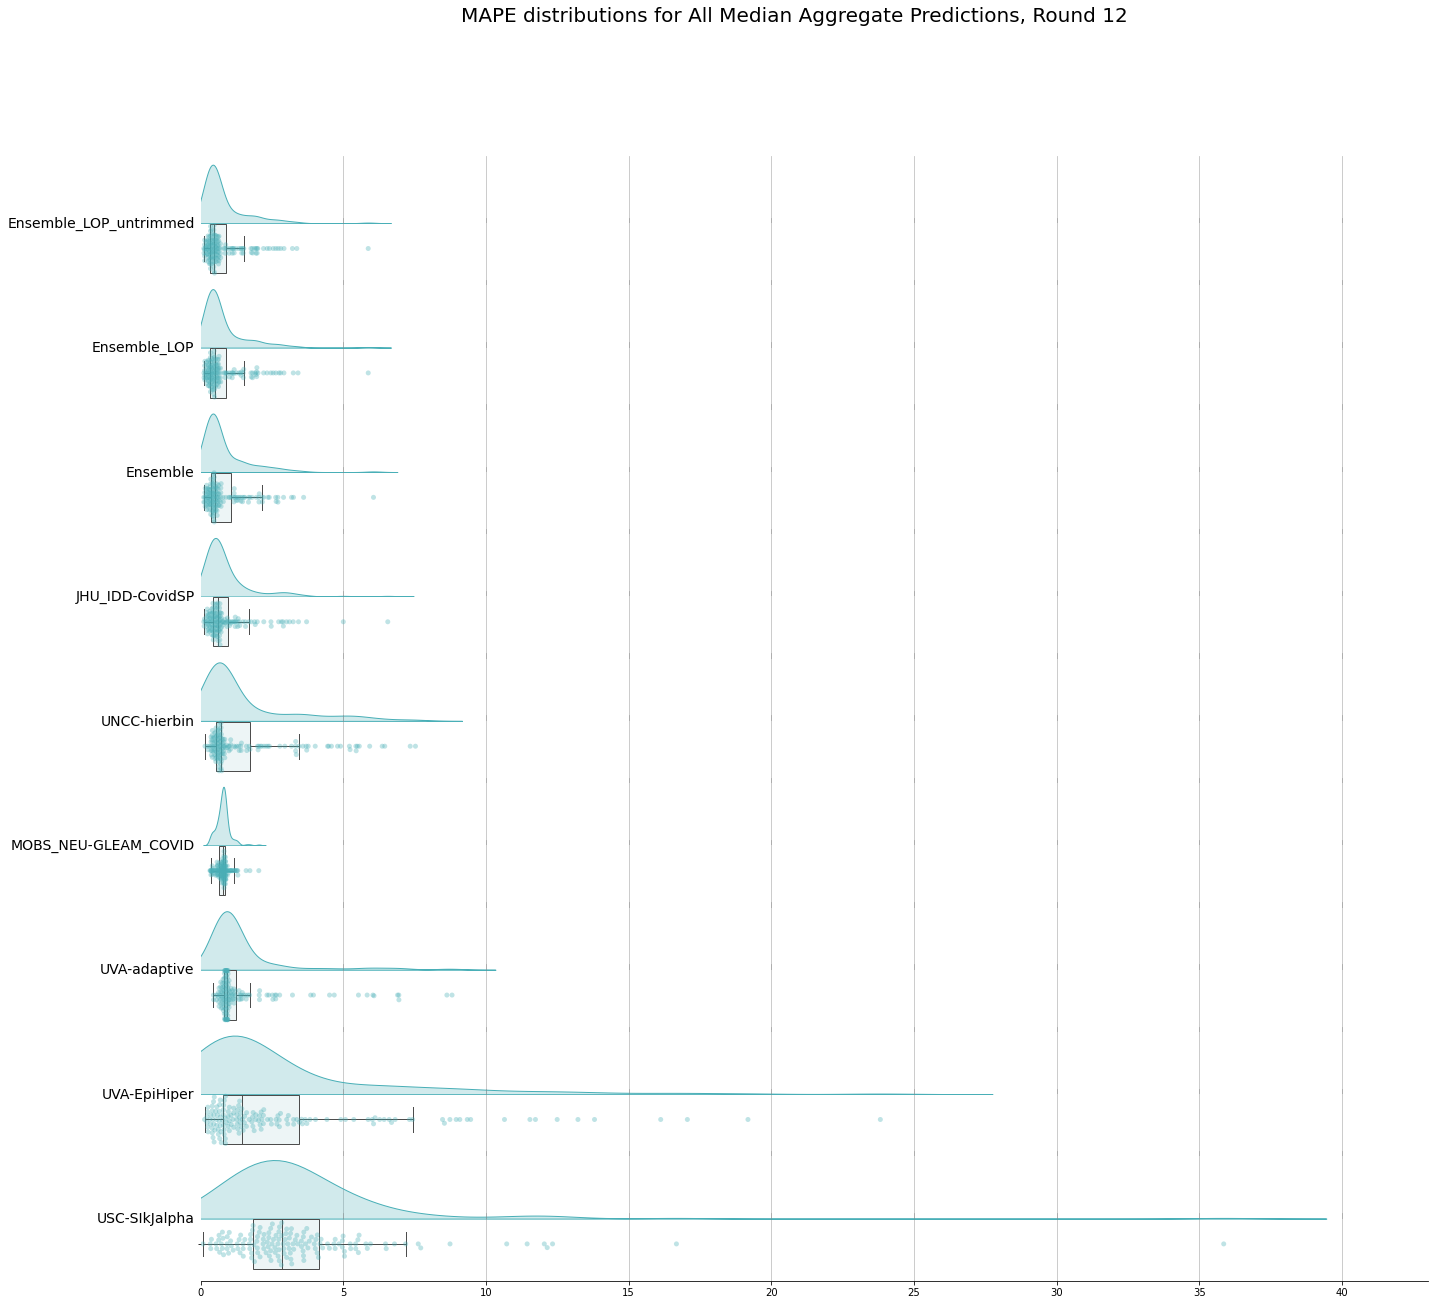

In [390]:
fig, ax_mat = create_penguin_plots(mapealldf,kde_args = {"lw":1,"bw_adjust":.9},
                                   title = 'MAPE distributions for All Median Aggregate Predictions, Round 12')

plt.savefig('mapedistributionsplot_all.pdf')